In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys

from CNN import CNN, train, test, plot_confusion_matrix
import torch
import timeit
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sizes = [28, 14, 7, 4]
train_data = [None, None, None, None]
loss_data = [None, None, None, None]
test_data = [None, None, None, None]
cmt = [None, None, None, None]
cnn = [None, None, None, None]

for i in range(len(cnn)):
    if i < 2:
        cnn[i] = CNN(img_shape = sizes[i], noise = True)
    else:
        cnn[i] = CNN(img_shape = sizes[i])
    

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1631631159818/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
for i in range(len(cnn)):
    start = timeit.default_timer()
    train_data[i], loss_data[i] = train(cnn[i], cnn[i].loaders, 75 + (30*i))
    end = timeit.default_timer()
    time = np.round((end - start) / 60, 2)
    print('Training completion time: ', time, 'minutes\n')
    
    
    start = timeit.default_timer()
    cmt[i], test_data[i] = test(cnn[i], cnn[i].loaders)
    end = timeit.default_timer()
    time = np.round((end - start) / 60, 2)
    print('Testing completion time: ', time, 'minutes\n')
    
    print('Saving the models...')
    
    model_path = '../models/April_5th_2022/noisy_data_training/' + str(sizes[i]) + 'x' + str(sizes[i])'/cnn_model' + str(sizes[i]) + 'x' + str(sizes[i])
    weights_path = '../models/April_5th_2022/noisy_data_training/cnn_weights' + str(sizes[i]) + 'x' + str(sizes[i])
    torch.save(cnn[i], model_path)
    torch.save(cnn[i].state_dict(), weights_path)
    print("Done Saving\n")


In [114]:
dummy = torch.load('/Users/cristianespinosa/Documents/UCM_Undergraduate_Research/models/March_28th_2022/cnn_model7x7')#CNN(noise = False)

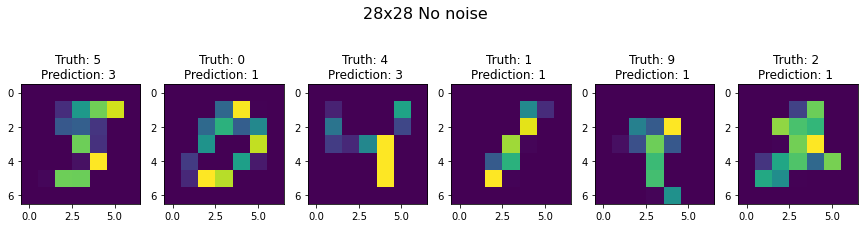

In [115]:
fig, axs = plt.subplots(1,6, figsize=(15,4))
axs = axs.ravel()
for i in range(6):
    resized = np.resize(dummy.train_data[i][0][0], (1,1,7,7))
    test_output, last_layer = dummy(torch.tensor(resized))
    pred_y = torch.max(test_output, 1)[1].numpy()[0]
    
    axs[i].imshow(dummy.train_data[i][0][0])
    axs[i].set_title('Truth: %i \nPrediction: %s '%(dummy.train_data[i][1],pred_y ))
fig.suptitle('28x28 No noise', fontsize=16)
#plt.subplots_adjust(top=0.1)
plt.show()
# dummy = CNN(noise = True)
# plt.imshow(dummy.train_data[0][0][0]); plt.show()
# plt.hist(dummy.train_data[0][0][0]);plt.show()

In [ ]:
plt.figure(figsize=(12,7))
plot_confusion_matrix(cmt[0], dummy.test_data.classes)
plt.savefig('../models/April_5th_2022/confusion_matrix_28x28_with_noise.png')

In [ ]:
plt.figure(figsize=(12,7))
plot_confusion_matrix(cmt[1], dummy.test_data.classes)
plt.savefig('../models/April_5th_2022/confusion_matrix_14x14_with_noise.png')

In [ ]:
plt.figure(figsize=(12,7))
plot_confusion_matrix(cmt[2], dummy.test_data.classes)
plt.savefig('../models/April_5th_2022/confusion_matrix_7x7_without_noise.png')

In [ ]:
plt.figure(figsize=(12,7))
plot_confusion_matrix(cmt[3], dummy.test_data.classes)
plt.savefig('../models/April_5th_2022/confusion_matrix_4x4_without_noise.png')

In [ ]:
# for i in range(len(cnn)):
#     model_path = '../models/March_28th_2022/cnn_model' + str(sizes[i]) + 'x' + str(sizes[i])
#     cnn[i] = torch.load(model_path)
#     loss_data = np.load('../models/March_28th_2022/cnn_loss_data.npy', allow_pickle=True)
#     test_data = np.load('../models/March_28th_2022/cnn_test_acc_data.npy')
#     train_data = np.load('../models/March_28th_2022/cnn_train_acc_data.npy', allow_pickle=True)

In [ ]:
# dummy = CNN(noise=True)
# train(dummy, loaders = dummy.loaders, num_epochs=2)

In [ ]:
# cmt = test(dummy, dummy.loaders)

In [ ]:
# plt.figure(figsize=(10,10))
# plot_confusion_matrix(cmt, dummy.test_data.classes)

In [ ]:
# plt.imshow(dummy.train_data[2][0][0])
# print(dummy.train_data[2][1])

In [ ]:
# plt.imshow(cnn[0].train_data[2][0][0])

In [ ]:
# plt.figure(figsize = (12,7))
# sn.heatmap(test_data[0], annot=True, cmap='Blues')
# plt.savefig('../models/confusion_matrix_28x28.png')

In [ ]:
plt.figure(figsize = (12,7))
sn.heatmap(test_data[1], annot=True, cmap='Blues')
# plt.savefig('../models/confusion_matrix_14x14.png')

In [ ]:
# plt.figure(figsize = (12,7))
# sn.heatmap(test_data[2], annot=True, cmap='Blues')
# plt.savefig('../models/confusion_matrix_7x7.png')

In [ ]:
# plt.figure(figsize = (12,7))
# sn.heatmap(test_data[3], annot=True, cmap='Blues')
# plt.savefig('../models/confusion_matrix_4x4.png')

In [ ]:
# train_data = np.array(train_data)
# np.save('../models/cnn_train_acc_data', train_data)

# test_data = np.array(test_data)
# np.save('../models/cnn_test_acc_data', test_data)

# loss_data = np.array(loss_data)
# np.save('../models/cnn_loss_data', loss_data)

In [ ]:
# rows = 4
# cols = 2
# f, axarr = plt.subplots(rows, cols, figsize=(20, 25))
# for i in range(rows):
#     for j in range(cols):
#         if j == 0:
#             title = "Train Accuracy (" + str(sizes[i]) + "x" + str(sizes[i]) + ")"
#             axarr[i][j].set_title(title)
#             axarr[i][j].set_xlabel("Epochs")
#             axarr[i][j].set_ylabel("Accuracy")
#             axarr[i][j].plot(train_data[i])
#         else:
#             title = "Loss Data (" + str(sizes[i]) + "x" + str(sizes[i]) + ")"
#             axarr[i][j].set_title(title)
#             axarr[i][j].set_xlabel("Epochs")
#             axarr[i][j].set_ylabel("Loss")
#             axarr[i][j].plot(loss_data[i])


In [6]:
# test_data = np.load('../models/March_28th_2022/cnn_test_acc_data.npy')
# train_data = np.load('../models/March_28th_2022/cnn_train_acc_data.npy', allow_pickle=True)

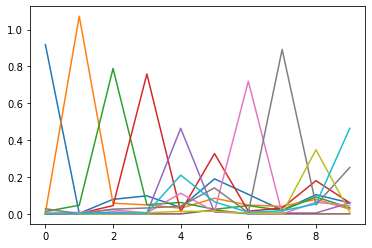

In [24]:
train_data[3]

[0.15,
 0.1,
 0.18,
 0.09,
 0.13,
 0.14,
 0.14,
 0.13,
 0.13,
 0.13,
 0.15,
 0.09,
 0.09,
 0.13,
 0.17,
 0.18,
 0.15,
 0.13,
 0.14,
 0.15,
 0.17,
 0.12,
 0.15,
 0.16,
 0.11,
 0.13,
 0.16,
 0.11,
 0.14,
 0.14,
 0.17,
 0.16,
 0.15,
 0.19,
 0.11,
 0.17,
 0.2,
 0.12,
 0.15,
 0.2,
 0.18,
 0.16,
 0.06,
 0.19,
 0.08,
 0.13,
 0.14,
 0.12,
 0.18,
 0.24,
 0.21,
 0.13,
 0.16,
 0.19,
 0.18,
 0.15,
 0.12,
 0.17,
 0.14,
 0.12,
 0.11,
 0.15,
 0.17,
 0.14,
 0.18,
 0.18,
 0.16,
 0.13,
 0.17,
 0.1,
 0.22,
 0.19,
 0.16,
 0.29,
 0.23,
 0.21,
 0.24,
 0.14,
 0.14,
 0.19,
 0.18,
 0.12,
 0.14,
 0.18,
 0.17,
 0.14,
 0.18,
 0.15,
 0.15,
 0.17,
 0.18,
 0.15,
 0.16,
 0.16,
 0.19,
 0.21,
 0.11,
 0.13,
 0.11,
 0.2,
 0.2,
 0.19,
 0.2,
 0.19,
 0.17,
 0.14,
 0.11,
 0.2,
 0.15,
 0.18,
 0.23,
 0.11,
 0.12,
 0.17,
 0.19,
 0.17,
 0.23,
 0.14,
 0.18,
 0.23,
 0.15,
 0.15,
 0.22,
 0.15,
 0.14,
 0.14,
 0.25,
 0.16,
 0.23,
 0.15,
 0.22,
 0.18,
 0.18,
 0.17,
 0.13,
 0.12,
 0.16,
 0.22,
 0.16,
 0.14,
 0.12,
 0.2,
 0.2,
 0.19,
 0